# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

1. There are 181 missing values. To clean, I changed the variable type from object to numeric since all prices should be only numbers and dropped the NA values because it would not make sense to having a listing on Airbnb without a price. 

In [ ]:
import pandas as pd 

airbnb = pd.read_csv("data/airbnb_hw.csv")

# Changing the variable type from object to numeric 
airbnb["Price"] = pd.to_numeric(airbnb["Price"], errors="coerce")

# Number of NA missing (181)
na_missing = airbnb["Price"].isna().sum()
print(na_missing)

# Drop NA values 
airbnb = airbnb.dropna(subset=["Price"])

181


2. About 76% of the inputs for subject_injury is missing, which is greatly concerning. The majority of the reported force_types associated to those missing values are bodily force, suggesting that officers may underreport injuries to avoid potential accountability for harming a subject.  

In [ ]:
police = pd.read_csv("data/mn_police_use_of_force.csv")

# Missing about 76% of the data
print(police["subject_injury"].value_counts())
print(police["subject_injury"].isna().sum())

# Makes a new column filling in the NA values with missing
police['subject_injury_cleaned'] = police["subject_injury"].fillna("Missing")

# Cross check subject_injury missing and force_type
check = pd.crosstab(police["subject_injury_cleaned"], police["force_type"])
print(check)
#

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64
9848
force_type              Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_cleaned                                                    
Missing                     2          7051               1421        0   
No                          0          1093                131        2   
Yes                         2          1286                 41        0   

force_type              Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury_cleaned                                                      
Missing                                27                 74           87   
No                                     33                 34            0   
Yes                                    44                 40            0   

force_type              Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury_cleaned                                                        
Missing   

In [ ]:
justice = pd.read_parquet("data/justice_data.parquet")

# Rename column
justice.rename(columns={
   "WhetherDefendantWasReleasedPretrial" : "PretrialRelease" 
}, inplace=True)

# Checking for abnormal inputs
print(justice["PretrialRelease"].value_counts())
print(justice["PretrialRelease"].isna().sum())

# Replacing rows with a 9 value as np.nan
import numpy as np
justice["PretrialRelease"] = justice["PretrialRelease"].replace(9, np.nan)

PretrialRelease
1    19154
0     3801
9       31
Name: count, dtype: int64
0


In [ ]:
# Rename column
justice.rename(columns={
    "ImposedSentenceAllChargeInContactEvent" : "ImposedSentenceCharges",
    "SentenceTypeAllChargesAtConvictionInContactEvent" : "SentenceTypeCharges"
    }, inplace=True)

print(justice["ImposedSentenceCharges"].value_counts())

justice["ImposedSentenceCharges"].replace(" ",np.nan,inplace=True)
print(justice["ImposedSentenceCharges"].isna().sum())

justice[justice["ImposedSentenceCharges"].isna()]["SentenceTypeCharges"].value_counts()

ImposedSentenceCharges
0                   4953
12                  1404
.985626283367556    1051
6                    809
3                    787
                    ... 
49.9712525667351       1
57.0349075975359       1
79.9260780287474       1
42.1642710472279       1
1.6570841889117        1
Name: count, Length: 483, dtype: int64
9053


/var/folders/nh/5h5_5pj17_ndl3lgcgx_fwvr0000gn/T/ipykernel_56989/1693668507.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  justice["ImposedSentenceCharges"].replace(" ",np.nan,inplace=True)


SentenceTypeCharges
4    8779
9     274
Name: count, dtype: int64

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [138]:
import pandas as pd
import matplotlib.pyplot

shark = pd.read_excel('GSAF5.xlsx')

# Q2
shark = shark.dropna(axis=1, how='all')
shark = shark.dropna(axis=0, how='all')

# Q3
shark = shark.dropna(subset=['Year'])
shark['Year'] = shark['Year'].astype(int)
shark = shark[shark['Year'] >= 1940]

# It is odd that there is a recorded value for 2026 when it is only 2025
# It also seems as though attacks are increasing over the years 
print(shark['Year'].min(), shark['Year'].max())
print(shark['Year'].value_counts().sort_index())


1940 2026
Year
1940     24
1941     27
1942     41
1943     28
1944     31
       ... 
2022     98
2023    109
2024     52
2025     48
2026      1
Name: count, Length: 87, dtype: int64


<Axes: xlabel='Age'>

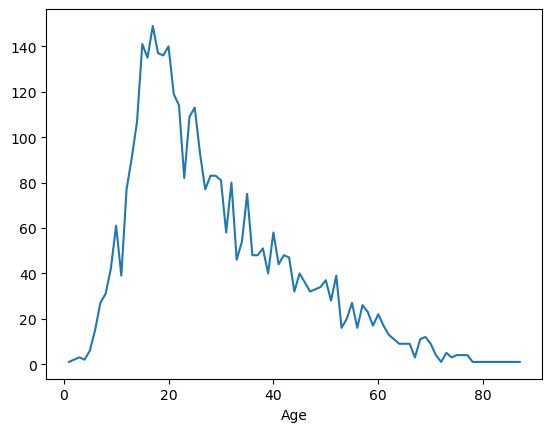

In [139]:
# Q4
shark['Age'] = pd.to_numeric(shark['Age'], errors='coerce')

ageHisto = shark.groupby('Age').size()
ageHisto.plot()

In [152]:
# Q5
#print(shark['Sex'].value_counts())

shark['Sex'] = shark['Sex'].str.strip().str.upper()
shark['Sex'] = shark['Sex'].replace({
    'M x 2': np.nan,
    'LLI': np.nan
})
shark['Sex'] = shark['Sex'].where(shark['Sex'].isin(['M','F']))

# 78.7% of victims are male
print(shark['Sex'].value_counts())

malecount = sum((shark['Sex']=='M'))
print(malecount/len(shark))

Sex
M    4333
F     720
Name: count, dtype: int64
0.7868167786453605


In [ ]:
# Q6 
shark['Type'] = shark['Type'].where(shark['Type'].isin(['Provoked', 'Unprovoked']), 'Unknown')

# 74.4% of attacks are unprovoked
print(shark['Type'].value_counts())

count = sum(shark['Type']=='Unprovoked')
print(count/len(shark))


Type
Unprovoked    4097
Unknown        892
Provoked       518
Name: count, dtype: int64
0.7439622298892319


In [142]:
# Q7
shark['Fatal Y/N'] = shark['Fatal Y/N'].where(shark['Fatal Y/N'].isin(['Y', 'N']), 'Unknown')

print(shark['Fatal Y/N'].value_counts())

Fatal Y/N
N          4213
Y           824
Unknown     470
Name: count, dtype: int64


In [ ]:
# Q8

gender = pd.crosstab(shark['Sex'], shark['Type'], normalize='index')
print(gender)
# more likely to attack women unprovoked

print()

fatal = pd.crosstab(shark['Type'], shark['Fatal Y/N'], normalize='index')
print(fatal)
# unprovoked attacks are more fatal

print()

fatalMF = pd.crosstab(shark['Sex'], shark['Fatal Y/N'], normalize='index')
print(fatalMF)
# males attacks are more likely to be fatal

# Sharks are scary but based on the statistics not something I should be too concerned about 


Type  Provoked   Unknown  Unprovoked
Sex                                 
F     0.038889  0.109722    0.851389
M     0.102931  0.125779    0.771290

Fatal Y/N          N   Unknown         Y
Type                                    
Provoked    0.953668  0.023166  0.023166
Unknown     0.412556  0.448430  0.139013
Unprovoked  0.817916  0.014157  0.167928

Fatal Y/N         N   Unknown         Y
Sex                                    
F          0.793056  0.083333  0.123611
M          0.771752  0.076160  0.152089


In [ ]:
# Split the column into a list of words for each row
print(shark.columns.tolist())

#Using RegEx to look for white shark 
wShark = shark['Species '].str.contains(r'\bwhite shark\b', case= False, na = False)

#Proportion
print(sum(wShark)/len(shark))

['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ', 'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22']
0.119665879789359


Sources Used:
https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
https://stackoverflow.com/questions/51794744 dropping-empty-columns-in-pandas-0-23
Used ChatGPT for debugging and asked CS friend about RegEx